## 3.1 Introducción

### Actividades básicas en el análisis estadístico

1. **Diseño del análisis**: Esta actividad involucra el planeamiento de los detalles para obtener los datos que necesitamos y la generación de la hipótesis a ser evaluada.
$$\newline$$
2. **Exploración de datos**: En esta actividad nos dedicamos a jugar con nuestros datos, los describimos, los resumimos, realizamos gráficos para mirarlos desde distintos ángulos. Esta exploración nos ayuda a asegurarnos que los datos que obtuvimos son completos y que la etapa de diseño fue correcta.
$$\newline$$
3. **Armado del modelo**: En esta actividad intentamos armar un modelo que explique el comportamiento de nuestros datos y pueda llegar a hacer predicciones sobre los mismos. La idea es que el modelo pueda describir las propiedades fundamentales de nuestros datos.
$$\newline$$
4. **Realizar estimaciones**: Aquí vamos a intentar realizar estimaciones basadas en el modelo que armamos anteriormente. También vamos a intentar estimar el tamaño del error que nuestro modelo puede tener en sus predicciones.
$$\newline$$
5. **Contraste de la hipótesis**: Esta actividad es la que va a producir la decisión final sobre si las predicciones del modelo son correctas y ayudarnos a concluir si los datos que poseemos confirman o rechazan la hipótesis que generamos en la actividad 1.

Librerías utilizadas para análisis estadístico

* numpy: El popular paquete matemático de Python, se utiliza tanto que mucha gente ya lo considera parte integral del lenguaje. Nos proporciona algunas funciones estadísticas que podemos aplicar fácilmente sobre los arrays de Numpy.
---
* scipy.stats: Este submodulo del paquete científico Scipy es el complemento perfecto para Numpy, las funciones estadisticas que no encontremos en uno, las podemos encontrar en el otro. $\newline$
* statsmodels: Esta librería nos brinda un gran número de herramientas para explorar datos, estimar modelos estadísticos, realizar pruebas estadísticas y muchas cosas más.
$\newline$
* matplotlib: Es la librería más popular en Python para visualizaciones y gráficos. Ella nos va a permitir realizar los gráficos de las distintas distribuciones de datos.
$\newline$
* seaborn: Esta librería es un complemento ideal de matplotlib para realizar gráficos estadísticos.
$\newline$
* pandas: Esta es la librería más popular para análisis de datos y financieros. Posee algunas funciones muy útiles para realizar estadística descriptiva sobre nuestros datos y nos facilita sobremanera el trabajar con series de tiempo.
$\newline$
* pyMC: pyMC es un módulo de Python que implementa modelos estadísticos bayesianos, incluyendo la cadena de Markov Monte Carlo(MCMC). pyMC ofrece funcionalidades para hacer el análisis bayesiano lo mas simple posible.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 3.2 Ejemplo: Ánimo de twitteros

¿Cómo se compara el ánimo de los twitteros por estado?

1. Obtención y limpieza de tuits. Se pueden obtener los datos a través de una API, y la limpieza que se hace es por ejemplo, eliminar caracteres raros, emojis, abreviaciones, etc.

2. Etiquetar los tuits en "positivos", "negativos", "neutros". Utilizan un algoritmo para etiquetar los tuits.

In [35]:
df_twitteros = pd.read_csv('animo_twitteros_semana.csv')

In [36]:
df_twitteros.groupby('lugar')['indice'].describe()

,count,mean,std,min,25%,50%,75%,max
lugar,,,,,,,,
CDMX,386.0,2.102541,0.351828,1.509981,1.859822,1.957246,2.332087,3.247226
JAL,386.0,2.071877,0.307735,1.398048,1.861999,1.997036,2.225046,3.132017
MEX,386.0,2.200279,0.234636,1.624115,2.025238,2.218133,2.348229,2.890521
NAC,386.0,1.995878,0.200881,1.497508,1.852517,1.980357,2.112439,2.635445
NL,386.0,1.788450,0.141891,1.390076,1.676641,1.773672,1.882200,2.207830


In [37]:
fig = px.line(df_twitteros, x="fecha", y="indice", color='lugar')
fig.show()

## 3.3 Ejemplo: Precios de venta vivienda

### Preguntas a responder

1. ¿Es posible modelar el valor de la vivienda utilizando sus características?
2. ¿Çómo varía el valor de la vivienda de estado a estado del país?

#### Obtención de los datos

1. Se utilizó web scrapping para obtener precios de ventas de casas y sus características
2. Fue importante mantener el anonimato de la información
3. Hubo una limpieza de información (obtener variables completas, evitar valores nulos, eliminar valores atípicos)

#### Estructura de dataframe

In [38]:
df_vivienda = pd.read_csv('precios_vivienda.csv')

In [39]:
df_vivienda.sample(3)

,estados,Precio,land_area,build_area,bedrooms,bathrooms,half_bathrooms,garages,Publicacion,Pisos
21134,SINALOA,3940000,269,392,4,4,0,3,41,1
3612,DISTRITO FEDERAL,3310000,70,229,3,4,1,2,49,1
20884,SAN LUIS POTOSI,870000,90,96,3,2,1,2,6,2


1. Si había valores ilógicos dentro de los registros, por ejemplo, casas con precios de 1 peso o con 100 habitaciones, o 1000 baños, se eliminaron los registros.

Cuando tenemos registros atípicos o ilógicos o faltantes se puede hacer lo siguiente:

* Eliminar el registro: solo aplica cuando la cantidad o naturaleza de los datos lo perminta
* Imputación de datos: consiste en asignar un valor para reemplazar datos faltantes, o datos atípicos. Hay varias formas de imputar, por ejemplo, utilizando la media, la mediana o la moda. Otra forma es utilizando conocimientos del negocio.


In [40]:
print('Filas           :',df_vivienda.shape[0])
print('Columnas        :',df_vivienda.shape[1])
print('Valores con NA  :')
print(df_vivienda.isna().sum())

Filas           : 24346
Columnas        : 10
Valores con NA  :
estados           0
Precio            0
land_area         0
build_area        0
bedrooms          0
bathrooms         0
half_bathrooms    0
garages           0
Publicacion       0
Pisos             0
dtype: int64


In [41]:
df_vivienda.head(1)

,estados,Precio,land_area,build_area,bedrooms,bathrooms,half_bathrooms,garages,Publicacion,Pisos
0,AGUASCALIENTES,8500000,980,500,4,5,1,3,22,2


#### Exploración de datos

In [42]:
fig = px.histogram(df_vivienda, x="Precio", nbins=20)
fig.show()

In [43]:
df_vivienda['log_precio'] = np.log(df_vivienda['Precio'])
fig = px.histogram(df_vivienda, x="log_precio", nbins=20)
fig.show()

In [44]:
df_vivienda.columns

Index(['estados', 'Precio', 'land_area', 'build_area', 'bedrooms', 'bathrooms',
       'half_bathrooms', 'garages', 'Publicacion', 'Pisos', 'log_precio'],
      dtype='object')

In [45]:
fig = px.scatter(df_vivienda[df_vivienda['estados']=='GUERRERO'], x = 'build_area', y = 'log_precio')
fig.show()

In [46]:
df_comp = df_vivienda[(df_vivienda['estados']=='DISTRITO FEDERAL')|(df_vivienda['estados']=='GUERRERO')]
fig = px.box(df_comp, x="estados", y="Precio")
fig.show()

In [47]:
resumen = df_vivienda.groupby(['estados'])['Precio'].describe()

In [48]:
resumen.sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
estados,,,,,,,,
TLAXCALA,91.0,1.226511e+06,8.792301e+05,370000.0,650000.0,990000.0,1550000.0,6000000.0
BAJA CALIFORNIA NORTE,193.0,1.445471e+06,2.021127e+06,371000.0,543757.0,745000.0,1485110.0,20000000.0
DURANGO,176.0,1.619843e+06,1.460186e+06,374022.0,845000.0,1300000.0,1811250.0,11000000.0
HIDALGO,515.0,1.694618e+06,1.310740e+06,370000.0,799500.0,1350000.0,2100000.0,11000000.0
CAMPECHE,19.0,1.932962e+06,1.550990e+06,421121.0,796515.0,1500000.0,2300000.0,5800000.0
TAMAULIPAS,210.0,2.008963e+06,2.189338e+06,385674.0,750000.0,1300000.0,2398500.0,20000000.0
SINALOA,238.0,2.437825e+06,2.884555e+06,373000.0,900000.0,1550000.0,2737500.0,27500000.0
COAHUILA,327.0,2.508091e+06,1.994408e+06,382000.0,1057500.0,1980000.0,3315000.0,15200000.0
MICHOACAN,298.0,2.573162e+06,2.515450e+06,372189.0,996000.0,1780000.0,3250000.0,17500000.0


Cuartiles - Nos da una idea de la distribución de los datos

Q1 - Cuartil uno - 25%
El 25% de los datos caen debajo de ese valor

Q2 - Cuartil dos - 50%
El 50% de los datos caen debajo de ese valor

Q3 - Cuartil tres - 75%
El 75% de los datos caen debajo de ese valor

Datos = [0,0,0,0,0,0,0,0,0,100,1000]

Media:








In [49]:
datos = [0,0,0,0,0,0,0,0,0,100,1000]
datos2 = [100,100,100,100,100,100,100]

In [50]:
print(np.mean(datos))
print(np.mean(datos2))

100.0
100.0


In [51]:
print(np.quantile(datos, [0.25,0.5,0.75]))
print(np.quantile(datos2, [0.25,0.5,0.75]))

[0. 0. 0.]
[100. 100. 100.]


## Modelo de regresión

In [52]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [53]:
df_vivienda.head(1)

,estados,Precio,land_area,build_area,bedrooms,bathrooms,half_bathrooms,garages,Publicacion,Pisos,log_precio
0,AGUASCALIENTES,8500000,980,500,4,5,1,3,22,2,15.955577


In [54]:
df_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24346 entries, 0 to 24345
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   estados         24346 non-null  object 
 1   Precio          24346 non-null  int64  
 2   land_area       24346 non-null  int64  
 3   build_area      24346 non-null  int64  
 4   bedrooms        24346 non-null  int64  
 5   bathrooms       24346 non-null  int64  
 6   half_bathrooms  24346 non-null  int64  
 7   garages         24346 non-null  int64  
 8   Publicacion     24346 non-null  int64  
 9   Pisos           24346 non-null  int64  
 10  log_precio      24346 non-null  float64
dtypes: float64(1), int64(9), object(1)
memory usage: 2.0+ MB


In [55]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)



corr_matrix = df_vivienda.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
90,log_precio,Precio,0.858266,0.858266
9,Precio,log_precio,0.858266,0.858266
29,build_area,log_precio,0.801627,0.801627
92,log_precio,build_area,0.801627,0.801627
2,Precio,build_area,0.765345,0.765345
20,build_area,Precio,0.765345,0.765345
49,bathrooms,log_precio,0.614828,0.614828
94,log_precio,bathrooms,0.614828,0.614828
42,bathrooms,build_area,0.610445,0.610445
24,build_area,bathrooms,0.610445,0.610445


In [56]:
df_vivienda.columns

Index(['estados', 'Precio', 'land_area', 'build_area', 'bedrooms', 'bathrooms',
       'half_bathrooms', 'garages', 'Publicacion', 'Pisos', 'log_precio'],
      dtype='object')

In [57]:
# División de los datos en train y test
# ==============================================================================
X = df_vivienda[['build_area', 'bedrooms','garages', 'Pisos', 'Publicacion']]
y = df_vivienda['log_precio']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [58]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     7358.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:30:31   Log-Likelihood:                -16532.
No. Observations:               19476   AIC:                         3.308e+04
Df Residuals:                   19470   BIC:                         3.312e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.5737      0.018    772.782      

In [59]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,13.539262,13.608119
build_area,0.003818,0.003918
bedrooms,0.007317,0.027151
garages,0.028157,0.036093
Pisos,0.073409,0.098713
Publicacion,-0.001116,-0.000183


In [60]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_15036\1529028432.py:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



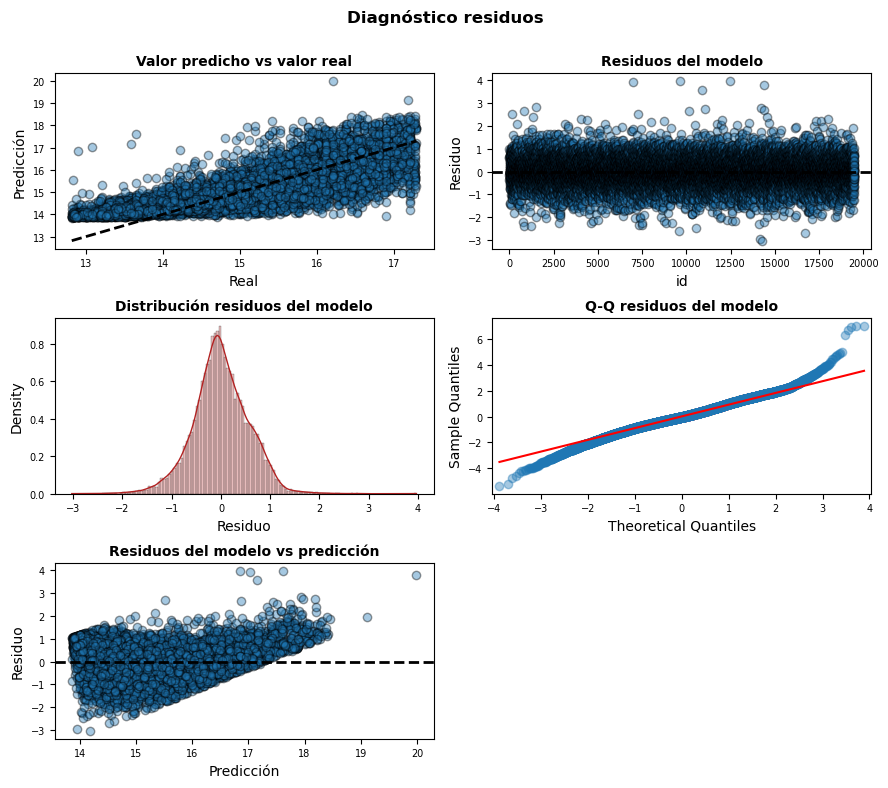

In [61]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [62]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9901670217514038, pvalue=3.91345625193504e-34)

In [63]:
# Error de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.5776372487403156
